Linear regression with one variable

In [1]:
from os.path import join, expanduser

from matplotlib.pyplot import plot, xlabel, ylabel
from pandas import DataFrame, read_excel
%matplotlib inline
from sklearn.linear_model import LinearRegression
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8


In [2]:
io: str = join(expanduser('~'), "Documents", "Data_Emigrant Study and APA.xlsx")

outcome: DataFrame    = read_excel(io=io, sheet_name='PTSD', header=0, index_col=0, usecols="A,GW", skiprows=[1])
y: DataFrame = outcome

predictors: DataFrame = read_excel(io=io,
                                   sheet_name='Harvard Trauma Questionnaire',
                                   header=0,
                                   index_col=0,
                                   usecols="A, B",
                                   skiprows=[1])
X: DataFrame = predictors

X: DataFrame = X.dropna(axis="rows", how="any")
y: DataFrame = y.dropna(axis="rows", how="any")


# Проверка на gooдубликаты, важно!
print(X[X.index.duplicated(keep=False)])
print(y[y.index.duplicated(keep=False)])
y: DataFrame = y[y.index.isin(X.index)]
X: DataFrame = X[X.index.isin(y.index)]

Empty DataFrame
Columns: [HTQ]
Index: []
Empty DataFrame
Columns: [PTSD]
Index: []


Text(0, 0.5, 'PTSD')

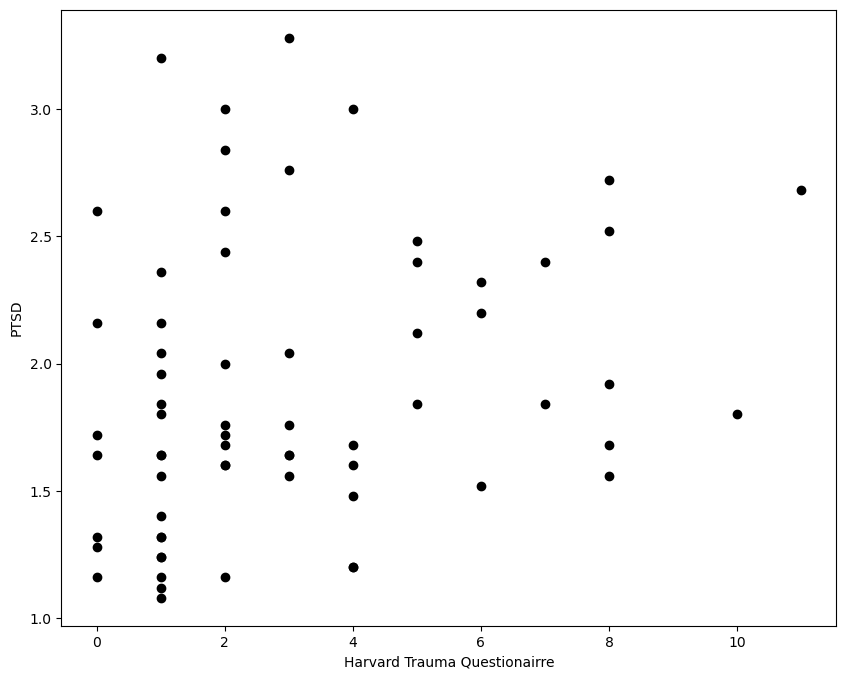

In [3]:
plot(X, y, 'o', color='black')
xlabel('Harvard Trauma Questionairre')
ylabel('PTSD')


In [4]:
# Create linear regression object and fit it to the data
LinReg = LinearRegression()
LinReg.fit(X=X, y=y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
print(LinReg.score(X=X, y=y)) # R^2

0.06729159189688128
